In [3]:
import pandas as pd
import sklearn as sk

# Exibe a versão do pandas e sklearn
pd.__version__, sk.__version__

('1.5.3', '1.2.2')

In [4]:
# Lê o arquivo CSV em um DataFrame do pandas
df = pd.read_excel('base.xlsx')

# Exibe as primeiras linhas do DataFrame
df.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [5]:
# total de linhas do dataframe
df.shape[0]

19103

In [6]:
# O método "isnull()" verifica quais valores do DataFrame são nulos e 
# retorna um DataFrame de valores booleanos com a mesma forma

# O método "sum()" soma os valores booleanos em cada coluna, contando quantos valores nulos existem

df.isnull().sum()

label                1
preprocessed_news    1
dtype: int64

In [7]:
# Remove linhas nulas
df = df.dropna()

#exibe de novo pra gente conferir o que mudou
df.isnull().sum()

label                0
preprocessed_news    0
dtype: int64

In [8]:
# total de linhas do dataframe
df.shape[0]

19102

In [9]:
# Encontra as linhas duplicadas usando o método "duplicated"
df.duplicated().sum()

18

In [10]:
# Remove as linhas duplicadas usando o método "drop_duplicates"
df = df.drop_duplicates()

#mostra o total de linhas na base de dados agora
df.shape[0]

19084

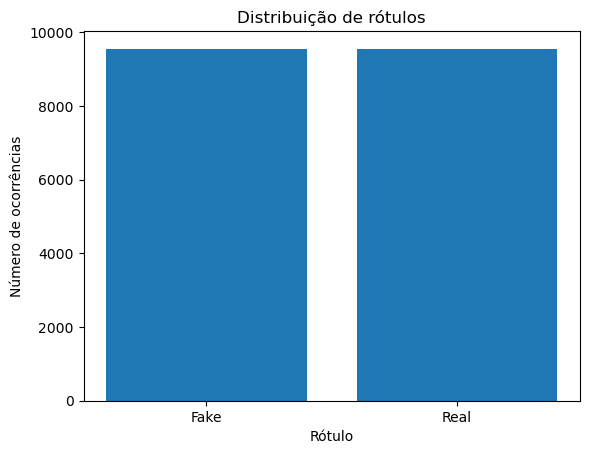

In [11]:
import matplotlib.pyplot as plt

# Conta o número de ocorrências de cada rótulo
label_count = df.label.value_counts()

# Cria um gráfico de barras usando a Matplotlib
plt.bar(label_count.index, label_count)

# Define o título do gráfico
plt.title('Distribuição de rótulos')

# Define o nome do eixo x do gráfico
plt.xlabel('Rótulo')

# Define o nome do eixo y do gráfico
plt.ylabel('Número de ocorrências')

# Mostrar os rótulos corretamente no eixo x
plt.xticks([0, 1], ['Fake', 'Real'])

# Exibe o gráfico
plt.show()

In [12]:
print("Total de rótulos Fake:", 100 * label_count[0] / (label_count[0] + label_count[1]))
print("Total de rótulos Real:", 100 * label_count[1] / (label_count[0] + label_count[1]))

# há um desbalanceamento aqui, que pode ser tratado com sobreamostragem, subamostragem dentre outras 
# técnicas

Total de rótulos Fake: 50.036679941312094
Total de rótulos Real: 49.963320058687906


In [13]:
import nltk
from nltk.corpus import stopwords

# Remove as palavras de parada (stop words) de cada notícia
stop_words = set(stopwords.words('portuguese'))
df['news_no_stopwords'] = df['preprocessed_news'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df['news_no_stopwords']

0        katia abreu diz vai colocar expulsao moldura n...
1        ray peita bolsonaro conservador fake entrevist...
2        reinaldo azevedo desmascarado policia federal ...
3        relatorio assustador bndes mostra dinheiro pub...
4        radialista americano fala sobre pt vendem ilus...
                               ...                        
19098    encontrar reunir presidente jair bolsonaro man...
19099    reabertura complexo parque disney orlar defini...
19100    publicação circular rede social pedir ministra...
19101    juiz wauner batista ferreiro machadar 3ª varar...
19102    empresário luciano hang dono havan doar moto r...
Name: news_no_stopwords, Length: 19084, dtype: object

In [14]:
#total de palavras ANTES das stopwords
df['preprocessed_news'].str.split().apply(len)

0         99
1        143
2        153
3        339
4         66
        ... 
19098    105
19099     78
19100    124
19101    122
19102     55
Name: preprocessed_news, Length: 19084, dtype: int64

In [15]:
#total de palavras DEPOIS das stopwords
df['news_no_stopwords'].str.split().apply(len)

0         99
1        142
2        153
3        337
4         66
        ... 
19098     80
19099     70
19100     97
19101     95
19102     49
Name: news_no_stopwords, Length: 19084, dtype: int64

In [16]:
#from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

# Reduz as palavras em cada notícia para sua forma canônica (lemmatization)
#lemmatizer = WordNetLemmatizer()
#df['news_lemmatized'] = df['news_no_stopwords'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


stemmer = SnowballStemmer("portuguese")

df['news_lemmatized'] = df['news_no_stopwords'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


In [17]:
from sklearn.model_selection import train_test_split

# Separa o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['news_lemmatized'], df['label'], test_size=0.2)

In [18]:
# Vetoriza os dados de texto usando o TF-IDF
tfidf_vectorizer = TfidfVectorizer()
train_features = tfidf_vectorizer.fit_transform(X_train)
test_features = tfidf_vectorizer.transform(X_test)

In [19]:
from sklearn.naive_bayes import MultinomialNB

# Cria um modelo de classificação Naive Bayes Multinomial e o treina com os dados de treinamento
clf = MultinomialNB()
clf.fit(train_features, y_train)

# Avalia a acurácia do modelo nos dados de treino
accuracy = clf.score(train_features, y_train)
print("Acurácia:", accuracy)

Acurácia: 0.8436497019715726


In [20]:
# Avalia a acurácia do modelo nos dados de teste
accuracy = clf.score(test_features, y_test)
print("Acurácia:", accuracy)

Acurácia: 0.8116321718627194


In [21]:
from sklearn.metrics import classification_report

# Faz a predição no conjunto de teste
y_pred = clf.predict(test_features)

# calcula as métricas de classificação
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])

# imprime o relatório
print(report)

              precision    recall  f1-score   support

        Fake       0.95      0.66      0.78      1899
        Real       0.74      0.96      0.84      1918

    accuracy                           0.81      3817
   macro avg       0.84      0.81      0.81      3817
weighted avg       0.84      0.81      0.81      3817



In [22]:
import re
import unidecode

def predict_text(text):
    text = " ".join(word for word in text.split())
    text = re.sub(r'[^\w$\s]', '', text)
    #text = " ".join(word for word in text.split() if word not in stopwords)
    text = " ".join(stemmer.stem(word) for word in text.split())

    X = tfidf_vectorizer.transform(text)
    y_pred = clf.predict(X)
    return y_pred


In [91]:
def on_button_clicked(_):
    text = text_input.value
    pred = predict_text(text)
    print(pred)

In [96]:
import ipywidgets as widgets

text_input = widgets.Text(description='Text')
button = widgets.Button(description='Predict')

button.on_click(on_button_clicked)

display(text_input)
display(button)

Text(value='', description='Text')

Button(description='Predict', style=ButtonStyle())

ValueError: Iterable over raw text documents expected, string object received.

In [23]:
def classify_text():
    # Obtendo o texto digitado pelo usuário
    text = input_text.get('1.0', 'end-1c')
    
    # Pré-processando o texto
    text_processed = stemmer.stem(' '.join([word for word in text.split() if word not in stop_words]))
    
    # Vetorizando o texto com o TF-IDF
    text_vectorized = tfidf_vectorizer.transform([text_processed])
    
    # Realizando a predição
    prediction = clf.predict(text_vectorized)[0]
    
    # Exibindo o resultado da predição em uma mensagem
    return prediction

In [25]:
import tkinter as tk
from tkinter import messagebox
from sklearn.feature_extraction.text import TfidfVectorizer

# Criando a janela do aplicativo
window = tk.Tk()
window.geometry('500x300')
window.title('Classificador de Notícias')

# Carregando o modelo treinado
clf = MultinomialNB()
clf.fit(train_features, y_train)

# Função para realizar a classificação


# Criando a caixa de texto
input_text = tk.Text(window, height=10, width=50)
input_text.pack()

# Criando o botão de classificação
classify_button = tk.Button(window, text='Classificar', command=classify_text)
classify_button.pack()

# Exibindo a janela do aplicativo
window.mainloop()
